In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from time import gmtime, strftime

%matplotlib inline

In [43]:
from data_augmentation import data_augmentation
from utils import bbox, create_fixed_image_shape, scaleRadius, random_crops
from utils import get_distorted_img
from augmentImages import process_img, unsharp_img

In [4]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_uint, img_as_ubyte
from skimage.filters.rank import subtract_mean, subtract_mean_percentile
from skimage.morphology import disk

In [ ]:
im = imread("/home/ubuntu/dataset/train/1/33096_left.jpeg")  # crop img
# im = imread('/home/ubuntu/dataset/train/4/22901_left.jpeg')  # crop img
# im = imread('/home/ubuntu/dataset/validation/0/12010_right.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/2/19897_left.jpeg')   # crop img
# im = imread('/home/ubuntu/dataset/validation/1/14825_right.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/4/15038_left.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/4/24222_right.jpeg')  # crop img
plt.imshow(im);

In [22]:
scale = 180
crop_shape = (256, 256)
random_draws = 4

Thu, 17 Dec 2015 08:11:38 [4332] LOG: Input image size (2336, 3504, 3)
Thu, 17 Dec 2015 08:11:38 [4332] LOG: r = 1491.000000 and s = 0.120724, scale = 180


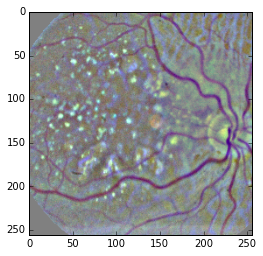

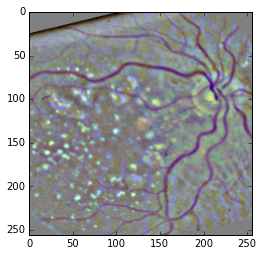

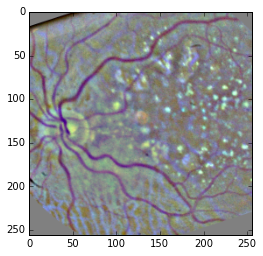

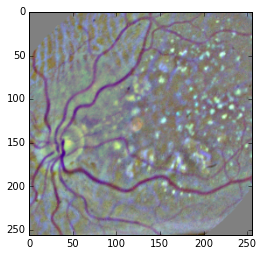

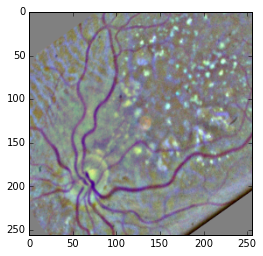

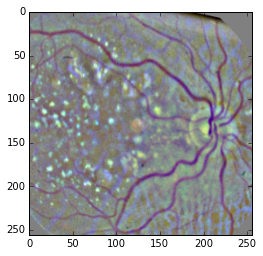

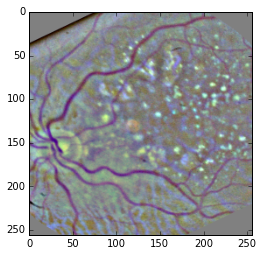

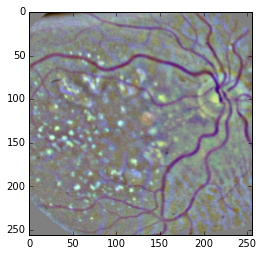

In [44]:
# name = "/home/ubuntu/dataset/train/1/33096_left.jpeg"
name = "/home/ubuntu/dataset/train/0/13701_left.jpeg"
imgs = process_img((name, 0), crop_shape, scale, False)
for im in imgs:
    plt.figure();
    plt.imshow(im);

Thu, 17 Dec 2015 08:11:43 [4332] LOG: Input image size (2336, 3504, 3)
Thu, 17 Dec 2015 08:11:43 [4332] LOG: r = 1491.000000 and s = 0.120724, scale = 180


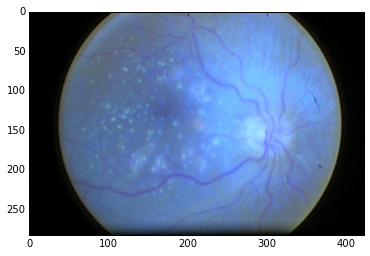

In [45]:
a = cv2.imread("/home/ubuntu/dataset/train/0/13701_left.jpeg")
b = scaleRadius(a, scale)
plt.imshow(b);
ua = unsharp_img(b)
ca = random_crops(ua, shape=crop_shape)
plt.imshow()

In [ ]:
a = bbox(scaleRadius(im,scale))
b = np.zeros(a.shape)
cv2.circle(b,(a.shape[1]//2,a.shape[0]//2),int(scale*0.9),(1,1,1),-1,8,0)
aa = cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30),-4,128)*b+128*(1-b)
rand_im = random_crops(aa, shape=crop_shape)

plt.imshow(a);
plt.figure()
plt.imshow(aa);
plt.figure()
plt.imshow(rand_im);

In [ ]:
iim = imread('/home/ubuntu/dataset/200_train/1/33096_left.jpeg')
orig = imread('/home/ubuntu/dataset/train/1/33096_left.jpeg')
plt.imshow(orig);
plt.figure();
plt.imshow(iim);
print iim.shape
del iim, orig

In [ ]:
scale = 200
crop_shape = (304, 304)
root_folder = '/home/ubuntu/dataset/'
in_folder_train = 'train/'
in_folder_val = 'validation/'
random_draws = 4
pb = [0.01, 0.30, 0.85, 1., 1.]


In [ ]:
from joblib import Parallel, delayed

In [ ]:
for a, b in names:
    print a, b

In [ ]:
def test(a, b, c):
    print a[0], a[1]

In [ ]:
plt.imshow(imread('/home/ubuntu/dataset/200_train_aug/0/10003_right.jpeg'));

In [ ]:
names = []
for r, ds, fs in os.walk(root_folder + in_folder_val):
    for f in fs:
        if '.jpeg' not in f:
            continue
        names.append((os.path.join(r, f), int(r.strip('/').split('/')[-1])))
# Create a parallel pool
with Parallel(n_jobs=8) as parallel:
    print len(names)
    rets = parallel(delayed(test)(fname, crop_shape, scale) 
                    for fname in names)